**Daily attendance of bike tracks**

*every row contains the number of bicycles on every track of the city(montreal), 
for every day of the year*

url = "https://raw.githubusercontent.com/ndas1971/Misc/master/bikes.csv"

1. Read 
2. Check head 
3. Check summary statistics 
4. plot the daily attendance of two tracks, 'Berri1', 'PierDup'
5. Check index , explore weekday attributes 
6. Get sum of all attendance as a function of the weekday
7. Display this in figure , what is the inference?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url = "https://raw.githubusercontent.com/ndas1971/Misc/master/bikes.csv"
df = pd.read_csv(url, index_col='Date', parse_dates=True, dayfirst=True)

<AxesSubplot:xlabel='Date'>

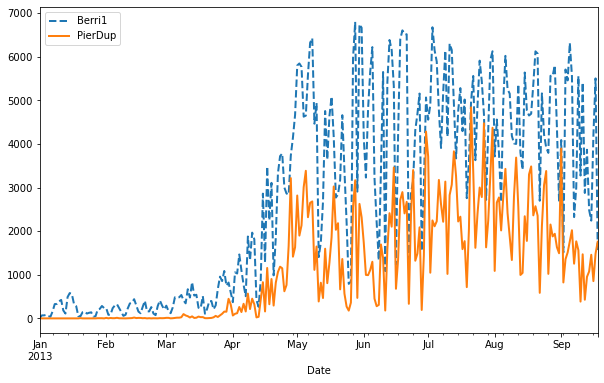

In [7]:
#2
df.head()

#3
df.describe()

#4
df[ ['Berri1', 'PierDup']].plot(figsize=(10,6), style=['--','-'], lw=2)

In [9]:
df.index.weekday #Monday=0, Sunday=6

Int64Index([1, 2, 3, 4, 5, 6, 0, 1, 2, 3,
            ...
            0, 1, 2, 3, 4, 5, 6, 0, 1, 2],
           dtype='int64', name='Date', length=261)

In [10]:
df_week = df.groupby(df.index.weekday).sum()
df_week.head()

,Berri1,CSC,Mais1,Mais2,Parc,PierDup,Rachel1,Totem_Laurier
Date,,,,,,,,
0,106826,51646,68087,129982,69767,44500,119211,72883
1,117244,54656,76974,141217,74299,40679,123533,76559
2,120434,59604,79033,145860,80437,42564,125173,79501
3,115193,52340,76273,141424,73668,36349,120684,74540
4,105701,44252,71605,127526,64385,36850,118556,71426


C:\Anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  after removing the cwd from sys.path.


(0.0, 151791.7)

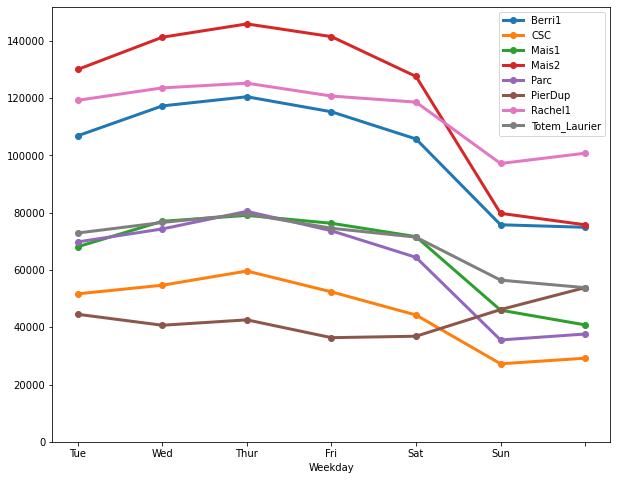

In [11]:
fig,ax = plt.subplots(1,1, figsize=(10,8))
df_week.plot(style='-o', lw=3, ax=ax)
ax.set_xlabel("Weekday")
ax.set_xticklabels('Mon,Tue,Wed,Thur,Fri,Sat,Sun'.split(","))
ax.set_ylim(0)